In [186]:
import numpy as np
import os
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid
from gym_minigrid.minigrid import OBJECT_TO_IDX
import matplotlib.pyplot as plt
%matplotlib inline

In [187]:
class QLearning:
    def __init__(self, actions, width, height):
        self.actions = actions
        self.alpha = 0.01
        self.gamma = 0.9
        self.epsilon = 1.0
        self.min_epsilon = 0.1
        self.epsilon_decay = 0.99995
        self.width = width
        self.height = height
        self.q_values = defaultdict(lambda: [0.0] * actions)
    
    def _idx_to_pos(self, idx):
        return idx % self.width, idx // self.width
    
    def _pos_to_idx(self, x, y):
        return y * self.width + x

    def _convert_state(self, s):
        agent_idx = np.where(s == OBJECT_TO_IDX["agent"])[0][0]
        x, y = self._idx_to_pos(agent_idx // 3)

        direction = s[agent_idx + 2]
        blocks = [direction]
        for i in range(-1, 2):
            for j in range(-1, 2):
                nx, ny = x + i, y + j
                if nx < 0 or ny < 0 or nx >= self.width or ny >= self.height:
                    blocks.append(OBJECT_TO_IDX["wall"])
                else:
                    blocks.append(s[self._pos_to_idx(nx, ny) * 3])

        return tuple(blocks)
        
    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        
        q_value = self.q_values[state][action]

        ################## write code ################################
        next_q_value = max(self.q_values[next_state])
        
        td_error = reward + self.gamma * next_q_value - q_value
        self.q_values[state][action] = q_value + self.alpha * td_error
        ##############################################################
    
    def act(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        return action
    
    def decay_epsilon(self):
        self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)
    
    def get_epsilon(self):
        return self.epsilon

In [188]:
from utils import gen_wrapped_env, show_video

In [189]:
env = gen_wrapped_env('MiniGrid-LavaCrossingS9N1-v0')

obs = env.reset()

agent_position = obs[0]

agent = QLearning(3, 7, 7)

## For Q-Learning
+ Q-learning update

In [190]:
rewards = []
for ep in range(50000):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    agent.decay_epsilon()
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}, epsilon: {}".format(ep+1, ep_rewards, agent.get_epsilon()))
env.close()

episode: 20, rewards: 0, epsilon: 0.9990004748575304
episode: 40, rewards: 0, epsilon: 0.9980019487655712
episode: 60, rewards: 0, epsilon: 0.9970044207255464
episode: 80, rewards: 0, epsilon: 0.9960078897398777
episode: 100, rewards: 0, epsilon: 0.9950123548119847
episode: 120, rewards: 0, epsilon: 0.9940178149462818
episode: 140, rewards: 0, epsilon: 0.9930242691481802
episode: 160, rewards: 0, epsilon: 0.992031716424084
episode: 180, rewards: 0, epsilon: 0.9910401557813908
episode: 200, rewards: 0, epsilon: 0.9900495862284902
episode: 220, rewards: 0, epsilon: 0.9890600067747632
episode: 240, rewards: 0, epsilon: 0.9880714164305809
episode: 260, rewards: 0, epsilon: 0.987083814207303
episode: 280, rewards: 0, epsilon: 0.986097199117278
episode: 300, rewards: 0, epsilon: 0.9851115701738412
episode: 320, rewards: 0, epsilon: 0.9841269263913146
episode: 340, rewards: 0, epsilon: 0.9831432667850051
episode: 360, rewards: 0, epsilon: 0.9821605903712036
episode: 380, rewards: 0, epsilon: 

In [191]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{(0, 2, 2, 2, 2, 10, 1, 2, 1, 1): [0.07414, 0.07319, 0.09935],
 (0, 2, 2, 2, 1, 10, 1, 1, 1, 1): [0.08353, 0.11088, 0.08496],
 (0, 2, 2, 2, 1, 10, 9, 1, 1, 9): [0.00141, 0.05577, 0.00836],
 (1, 2, 2, 2, 1, 10, 9, 1, 1, 9): [0.00588, 0.00428, 0.09406],
 (1, 1, 1, 9, 1, 10, 9, 1, 1, 9): [0.03014, 0.02178, 0.16637],
 (0, 1, 1, 9, 1, 10, 9, 1, 1, 9): [0.00355, 0.08254, 0.00014],
 (3, 1, 1, 9, 1, 10, 9, 1, 1, 9): [0.01953, 0.00452, 0.00132],
 (3, 2, 2, 2, 1, 10, 9, 1, 1, 9): [0.00664, 0.00093, 0.00043],
 (2, 2, 2, 2, 1, 10, 9, 1, 1, 9): [0.00255, 0.00038, 0.02662],
 (2, 2, 2, 2, 1, 10, 1, 1, 1, 1): [0.10768, 0.05113, 0.0359],
 (2, 2, 2, 2, 2, 10, 1, 2, 1, 1): [0.02566, 0.05701, 0.02101],
 (3, 2, 2, 2, 2, 10, 1, 2, 1, 1): [0.03504, 0.08692, 0.04466],
 (1, 2, 2, 2, 1, 10, 1, 1, 1, 1): [0.09595, 0.09223, 0.12933],
 (3, 2, 2, 2, 1, 10, 1, 1, 1, 1): [0.06229, 0.09737, 0.05728],
 (1, 2, 2, 2, 2, 10, 1, 2, 1, 1): [0.08621, 0.03299, 0.04408],
 (1, 2, 1, 1, 2, 10, 1, 2, 1, 1): [0.08945, 0.03898, 0.0

In [192]:
show_video()

In [193]:
os.makedirs('./logs', exist_ok=True)
pd.Series(rewards).to_csv('./logs/rewards_qlearning_lava_2.csv')

In [195]:
sarsa_logs = pd.read_csv('./logs/rewards_sarsa_lava_2.csv', index_col=False).iloc[:, 1]
q_logs = pd.read_csv('./logs/rewards_qlearning_lava_2.csv', index_col=False).iloc[:, 1]

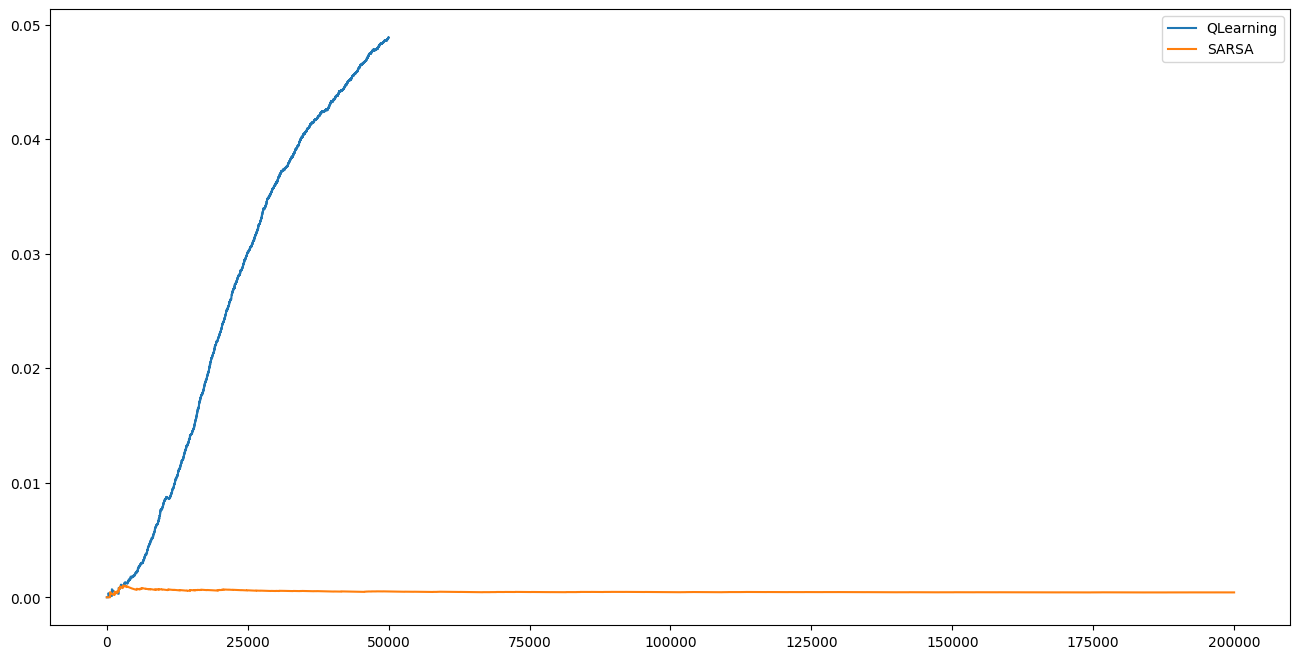

In [196]:
plt.figure(figsize=(16, 8))
plt.plot(q_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0]))+1), label="QLearning")
plt.plot(sarsa_logs.cumsum() / (pd.Series(np.arange(sarsa_logs.shape[0]))+1), label="SARSA")
plt.legend()